<a href="https://colab.research.google.com/github/ValentynaGrach/ml-homeworks/blob/main/%D0%94%D0%97_7_%D0%94%D0%B8%D1%81%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81_%D0%BA%D0%BB%D0%B0%D1%81%D1%96%D0%B2_ValentynaGrach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1️⃣ Завантаження та первиний аналіз датасету glass

In [ ]:
from google.colab import files
import pandas as pd
from google.colab import data_table
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Завантажуємо файл
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Завантаження датасету без стовпця ID (0 - це перший стовпець)
glass = pd.read_csv(file_name, header=None, usecols=range(1, 11))  # Виключаємо стовпець ID

# Додаємо назви колонок згідно з описом
glass.columns = ['RefractiveIndex', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

# Виводимо повідомлення про успішне завантаження
print("✅ Файл", file_name, "зчитано успішно. Розмір:", glass.shape)

# Показуємо перші рядки зчитаного файлу
display(data_table.DataTable(glass.head()))

Saving glass.data to glass.data
✅ Файл glass.data зчитано успішно. Розмір: (214, 10)


,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
import os
print(os.listdir())

# directory_path = "/content/"
# for file_name in os.listdir(directory_path):
#     file_path = os.path.join(directory_path, file_name)
#     if os.path.isfile(file_path):
#         os.remove(file_path)
#         print("Файл", file_name, "успішно видалено.")

['.config', 'glass.data', 'sample_data']


## первинний аналіз даних

In [ ]:
# Перевірка на пропуски
print("\n🔍 Перевірка на пропуски в glass:")
print(glass.isnull().sum())

# Перевірка форматів всіх стовпців
print("\n🔹 Формати стовпців у glass:")
print(glass.dtypes)

# Огляд статистичних характеристик
print("\n📊 Статистичні характеристики для glass:")
display(glass.describe())

# перевірка на дублікати
duplicates = glass.duplicated().sum()
print("\n🔍 Кількість дублікатів:", duplicates)


🔍 Перевірка на пропуски в glass:
RefractiveIndex    0
Na                 0
Mg                 0
Al                 0
Si                 0
K                  0
Ca                 0
Ba                 0
Fe                 0
Type               0
dtype: int64

🔹 Формати стовпців у glass:
RefractiveIndex    float64
Na                 float64
Mg                 float64
Al                 float64
Si                 float64
K                  float64
Ca                 float64
Ba                 float64
Fe                 float64
Type                 int64
dtype: object

📊 Статистичні характеристики для glass:


,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000



🔍 Кількість дублікатів: 1


---

📌 Датасет не містить пропущених значень чи дублікатів ✅, а статистичні характеристики числових змінних вказують на те, що значення в межах логічних діапазонів 📊.

---

## фіча інжиніринг

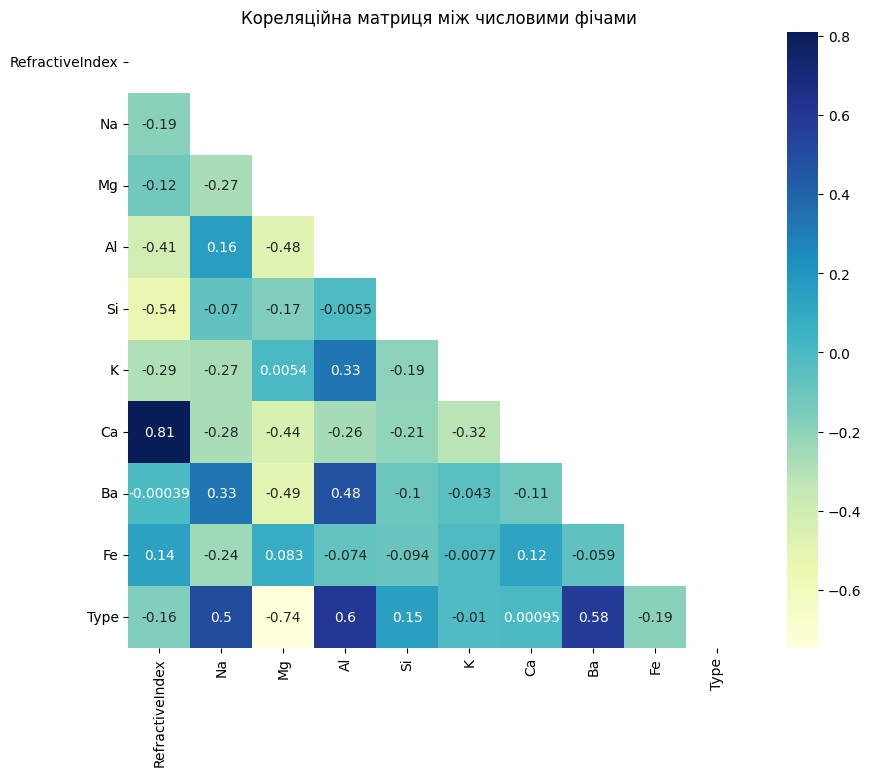

In [ ]:
# Перевірка кореляцій між числовими фічами (кореляційна матриця)
corr_matrix = glass.select_dtypes(include=['float64', 'int64']).corr()

# Візуалізація кореляційної матриці heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":10}, mask=mask)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Кореляційна матриця між числовими фічами")
plt.show()

---
📌 Найбільше впливають на класифікацію такі ознаки:

**Mg** (**-0.74**): Чудово розділяє класи (сильна від'ємна кореляція).  
**Al** (**0.6**): Має сильну позитивну кореляцію з класами.  
**Ba** (**0.58**): Значна позитивна кореляція.  

⚠️ Помітили мультиколінеарність між ознаками **Ca** та **RefractiveIndex** (**0.81**), можливо, треба буде їх об'єднати або одну виключити.

---

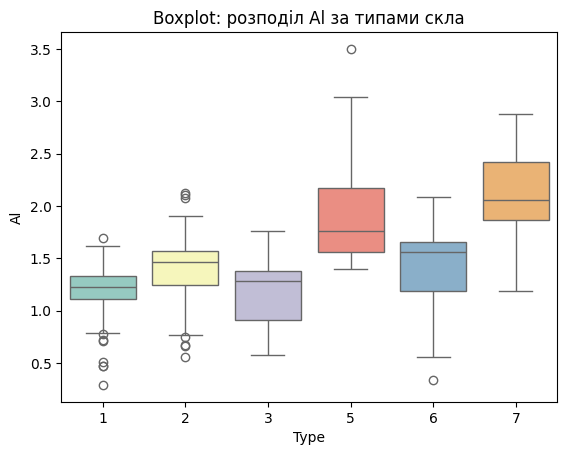

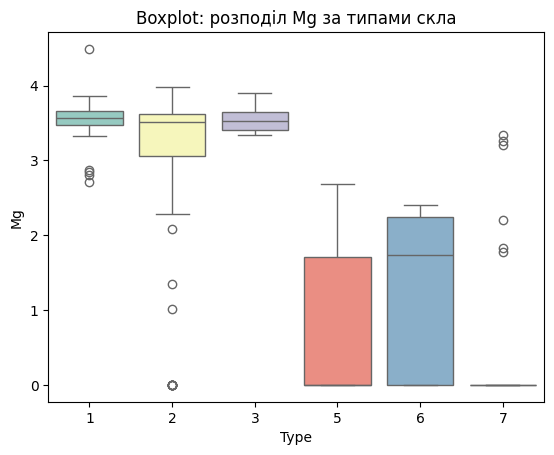

In [ ]:
# Al
sns.boxplot(x='Type', y='Al', data=glass, hue='Type', palette="Set3", legend=False)
plt.title('Boxplot: розподіл Al за типами скла')
plt.show()

# Mg
sns.boxplot(x='Type', y='Mg', data=glass, hue='Type', palette="Set3", legend=False)
plt.title('Boxplot: розподіл Mg за типами скла')
plt.show()

---
📌 **Висновки за графіками:**

1. **Al**:
   - Має чітке зростання значень з ростом класу.
   - Особливо чітко вирізняється клас **7**, у якого значення **Al** найбільші.

2. **Mg**:
   - Високі значення для класів **1, 2, 3**.
   - Низькі значення для класів **5, 6, 7**.
   - Дуже добре розрізняє ці дві групи класів.

Ці дві ознаки є важливими для моделі через їхню здатність добре розділяти класи.  

---

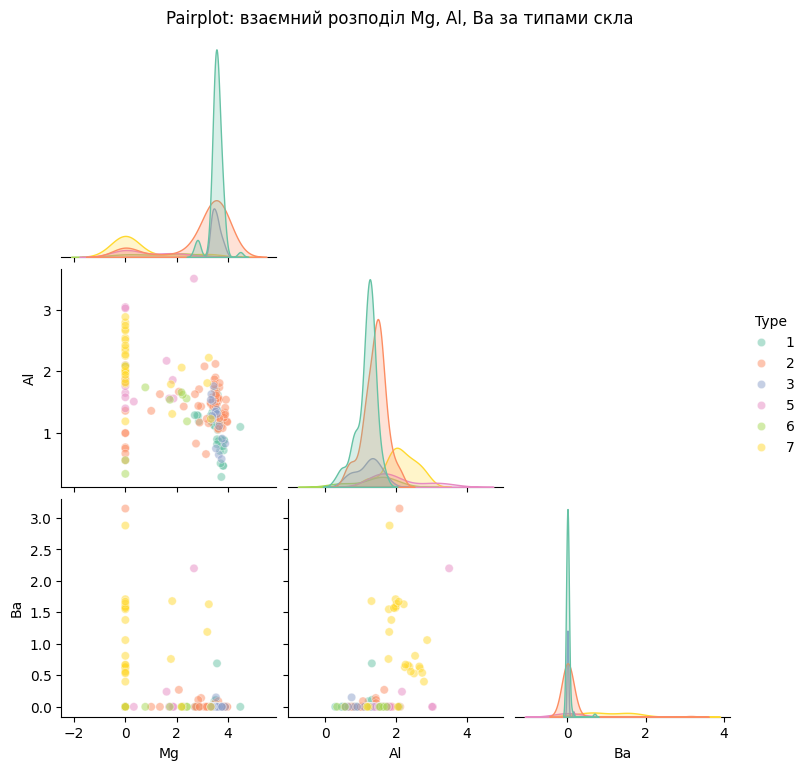

In [ ]:
sns.pairplot(glass[['Mg', 'Al', 'Ba', 'Type']], hue='Type', palette="Set2", height=2.5, corner=True, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot: взаємний розподіл Mg, Al, Ba за типами скла', y=1.02)
plt.show()

---

📝 **Висновок**

- **Mg** та **Al** дуже чітко розподіляють типи скла на дві великі групи:
  - Типи **1, 2, 3** мають високі значення **Mg** і низькі значення **Al**.
  - Типи **5, 6, 7** мають низькі значення **Mg** і високі значення **Al**.

- Ознака **Ba** значно виділяє клас **7** серед інших типів (найвищі значення серед усіх класів).

🎯 **Отже**, ознаки **Mg**, **Al** та **Ba** дуже добре підходять для подальшого створення додаткових ознак (Feature Engineering) і є важливими для побудови якісної моделі класифікації.

---

---
💡 фіча - **Сума металевих елементів (Metals)**  
Ознака, яка сумує вміст металів (Na, Mg, Al, K, Ca, Ba, Fe). Можливо, що сумарний вміст металів має вплив на тип скла.

💡 фіча - **Відношення Al до Mg (Al_Mg_ratio)**  
Ця ознака може бути корисною, бо ці два елементи мають суттєві протилежні розподіли по класах.

---

In [ ]:
# Створення нової фічі: сума металів
glass['Metals'] = (glass['Na'] + glass['Mg'] + glass['Al'] + glass['K'] + glass['Ca'] + glass['Ba'] + glass['Fe']).round(2)
# Створення нової фічі: відношення Al до Mg
glass['Al_Mg_ratio'] = (glass['Al'] / (glass['Mg'] + 1e-5)).round(2)  # додаємо невелике число для уникнення ділення на 0
display(data_table.DataTable(glass[['Metals', 'Al_Mg_ratio']]))

,Metals,Al_Mg_ratio
0,28.04,0.24
1,27.16,0.38
2,26.79,0.43
3,26.98,0.35
4,26.75,0.34
...,...,...
209,27.34,288000.00
210,26.90,199000.00
211,26.46,202000.00
212,26.37,194000.00


In [ ]:
# Показуємо перші рядки зчитаного файлу
print(glass.columns)
print(glass.shape)
display(data_table.DataTable(glass.head()))

Index(['RefractiveIndex', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type', 'Metals', 'Al_Mg_ratio'],
      dtype='object')
(214, 12)


,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Metals,Al_Mg_ratio
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,28.04,0.24
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,27.16,0.38
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,26.79,0.43
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,26.98,0.35
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,26.75,0.34


# 2️⃣ усунення дисбалансу

In [ ]:
from google.colab import files
import pandas as pd
from google.colab import data_table
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

## перевірка на дисбаланс класів

Розподіл класів у датасеті:

+---------+---------+
|   Class |   Count |
+=========+=========+
|       2 |      76 |
+---------+---------+
|       1 |      70 |
+---------+---------+
|       7 |      29 |
+---------+---------+
|       3 |      17 |
+---------+---------+
|       5 |      13 |
+---------+---------+
|       6 |       9 |
+---------+---------+


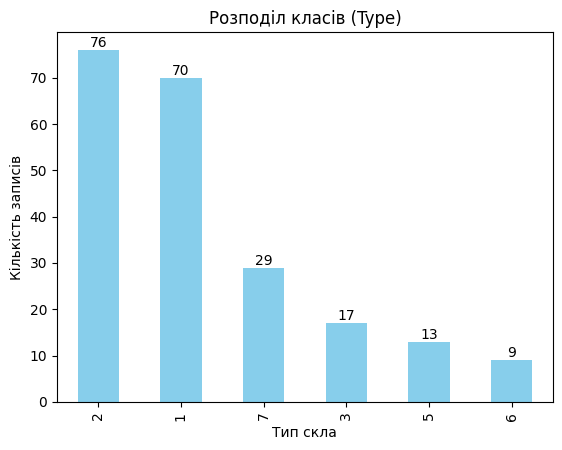

In [ ]:
# Перевіряємо розподіл класів у колонці "Type"
class_counts = glass['Type'].value_counts()

# Виводимо кількість для кожного класу за допомогою tabulate
class_counts_table = class_counts.reset_index()
class_counts_table.columns = ['Class', 'Count']
print("Розподіл класів у датасеті:\n")
print(tabulate(class_counts_table.values, headers=class_counts_table.columns, tablefmt='grid'))

# Побудуємо графік для візуалізації з підписами над стовпцями
ax = class_counts.plot(kind='bar', color='skyblue')
plt.title('Розподіл класів (Type)')
plt.xlabel('Тип скла')
plt.ylabel('Кількість записів')

# Додаємо підписи над стовпцями
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()

### 📝 Висновок:
- ⚖️ У датасеті є **дисбаланс класів**: класи **2** та **1** мають більше записів, а клас **6** — менше.
- 💡 Це може вплинути на точність моделі, і для покращення результатів застосуємо методи корекції дисбалансу.

In [ ]:
!pip install imbalanced-learn

## виправлення дисбалансу

1. Підготовка даних

In [ ]:
# Розділяємо дані на ознаки (X) та таргет (y)
X = glass.drop(columns=['Type'])
y = glass['Type']

# Розділяємо дані на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

2. Корекція дисбалансу за допомогою SMOTE

In [ ]:
# Використовуємо SMOTE для корекції дисбалансу
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Виводимо розподіл класів після SMOTE
print("Розподіл класів після SMOTE:")
print(y_train_smote.value_counts())

Розподіл класів після SMOTE:
Type
2    53
1    53
6    53
5    53
3    53
7    53
Name: count, dtype: int64


## порівняння результатів до та після застосування SMOTE

1. Побудова моделі без корекції дисбалансу

In [ ]:
# Масштабування даних для логістичної регресії
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Побудова моделі без корекції дисбалансу
log_reg_no_smote = LogisticRegression(max_iter=2000, random_state=42)
log_reg_no_smote.fit(X_train_scaled, y_train)

# Передбачення на тестових даних
y_pred_no_smote = log_reg_no_smote.predict(X_test_scaled)

# Виведення результатів без SMOTE з параметром zero_division=1
print("\nОцінка логістичної регресії без SMOTE (з масштабуванням):")
print("Accuracy:", accuracy_score(y_test, y_pred_no_smote))
print("Precision:", precision_score(y_test, y_pred_no_smote, average='weighted', zero_division=1))
print("Recall:", recall_score(y_test, y_pred_no_smote, average='weighted', zero_division=1))
print("F1-Score:", f1_score(y_test, y_pred_no_smote, average='weighted', zero_division=1))


Оцінка логістичної регресії без SMOTE (з масштабуванням):
Accuracy: 0.676923076923077
Precision: 0.6715099715099716
Recall: 0.676923076923077
F1-Score: 0.6562197802197802


2. Побудова моделі після SMOTE

In [ ]:
# Масштабування даних для логістичної регресії
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Побудова логістичної регресії на масштабованих даних після SMOTE
log_reg_smote = LogisticRegression(max_iter=2000, random_state=42)
log_reg_smote.fit(X_train_smote_scaled, y_train_smote)

# Передбачення на тестових даних
y_pred_smote = log_reg_smote.predict(X_test_scaled)

# Оцінка моделі після SMOTE
print("\nОцінка логістичної регресії після SMOTE (з масштабуванням):")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote, average='weighted', zero_division=1))
print("Recall:", recall_score(y_test, y_pred_smote, average='weighted', zero_division=1))
print("F1-Score:", f1_score(y_test, y_pred_smote, average='weighted', zero_division=1))


Оцінка логістичної регресії після SMOTE (з масштабуванням):
Accuracy: 0.6
Precision: 0.6572460872460872
Recall: 0.6
F1-Score: 0.5982740788623141


# 3️⃣ перевірка впливу на точність моделі

3. Візуалізація результатів

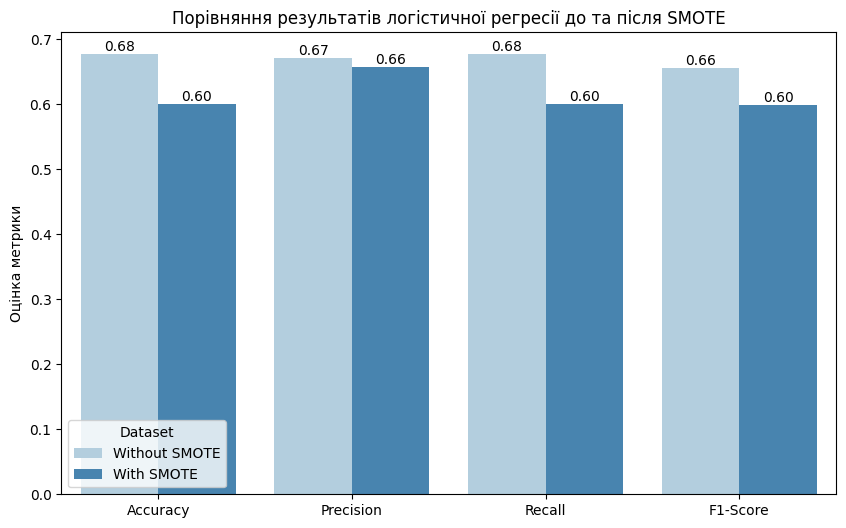

In [ ]:
accuracy_no_smote = accuracy_score(y_test, y_pred_no_smote)
precision_no_smote = precision_score(y_test, y_pred_no_smote, average='weighted', zero_division=1)
recall_no_smote = recall_score(y_test, y_pred_no_smote, average='weighted', zero_division=1)
f1_no_smote = f1_score(y_test, y_pred_no_smote, average='weighted', zero_division=1)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote, average='weighted', zero_division=1)
recall_smote = recall_score(y_test, y_pred_smote, average='weighted', zero_division=1)
f1_smote = f1_score(y_test, y_pred_smote, average='weighted', zero_division=1)

# Порівняння результатів
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
no_smote_values = [accuracy_no_smote, precision_no_smote, recall_no_smote, f1_no_smote]
smote_values = [accuracy_smote, precision_smote, recall_smote, f1_smote]

# Створення DataFrame для результатів
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Without SMOTE': [accuracy_no_smote, precision_no_smote, recall_no_smote, f1_no_smote],
    'With SMOTE': [accuracy_smote, precision_smote, recall_smote, f1_smote]
})

# Створення графіку для порівняння результатів
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Metric', y='value', hue='variable', data=results_df.melt(id_vars="Metric"), palette="Blues")
plt.title('Порівняння результатів логістичної регресії до та після SMOTE')
plt.ylabel('Оцінка метрики')
plt.xlabel('')

# Додаємо підписи значень над стовпцями
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='edge')
plt.legend(title='Dataset')
plt.show()

## 📌 **Фінальний висновок за графіком:**

- Використання методу **SMOTE** дещо знизило показники якості моделі, що є досить типовим для невеликих наборів даних (214 записів). Причиною може бути надмірне "штучне" збільшення даних, через що модель втратила частину своєї узагальнюючої здатності.
- Найвищі показники продемонструвала модель **без використання SMOTE**:
  - Accuracy: **0.68**
  - Precision: **0.67**
  - Recall: **0.68**
  - F1-Score: **0.66**

- Водночас, модель з SMOTE продемонструвала **збалансовані значення метрик (~0.60)**. Вона може бути корисною, якщо метою є збалансоване розпізнавання класів, а не тільки максимальна точність.

---

✅ **Загальний підсумок:**  
Для цього конкретного набору даних логістична регресія без використання додаткового балансування (SMOTE) показала кращий результат. Проте метод SMOTE допоміг уникнути серйозних помилок у класифікації малочисельних класів, хоч і трохи знизив загальні показники.🚀